In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('insurance.csv')
data.head(6)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


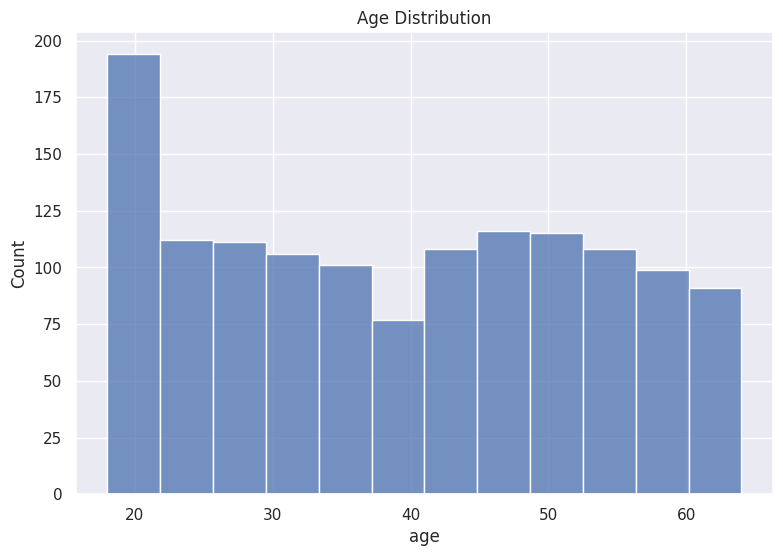

In [6]:
sns.set()
plt.figure(figsize=(9, 6))
sns.histplot(data['age'])
plt.title('Age Distribution')
plt.show()

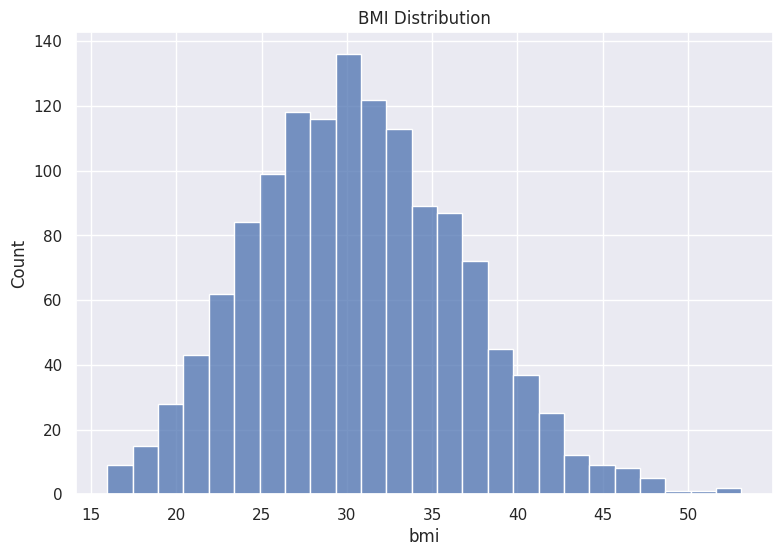

In [7]:
sns.set()
plt.figure(figsize=(9, 6))
sns.histplot(data['bmi'])
plt.title('BMI Distribution')
plt.show()

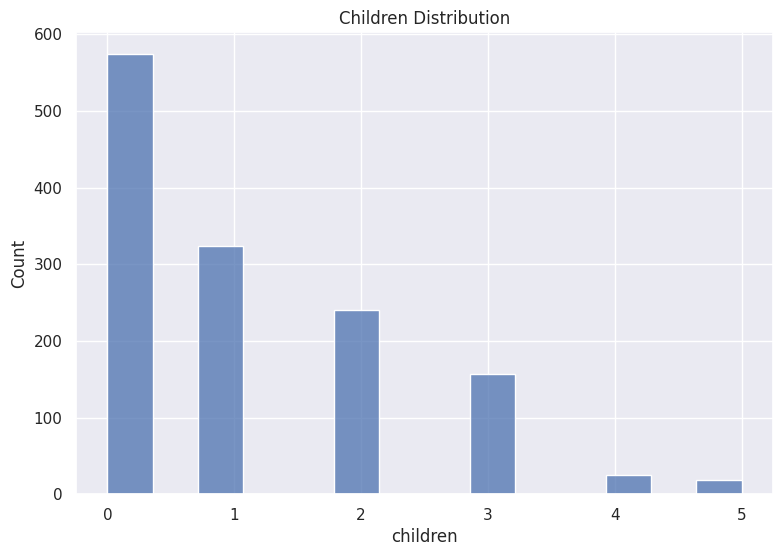

In [8]:
sns.set()
plt.figure(figsize=(9, 6))
sns.histplot(data['children'])
plt.title('Children Distribution')
plt.show()

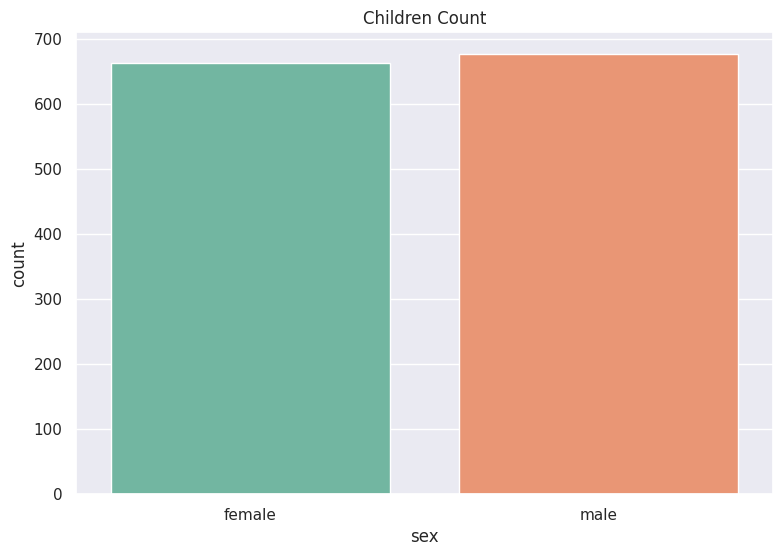

In [9]:
sns.set()
plt.figure(figsize=(9, 6))
sns.countplot(x = data['sex'], data=data, palette='Set2', hue='sex')
plt.title('Children Count')
plt.show()

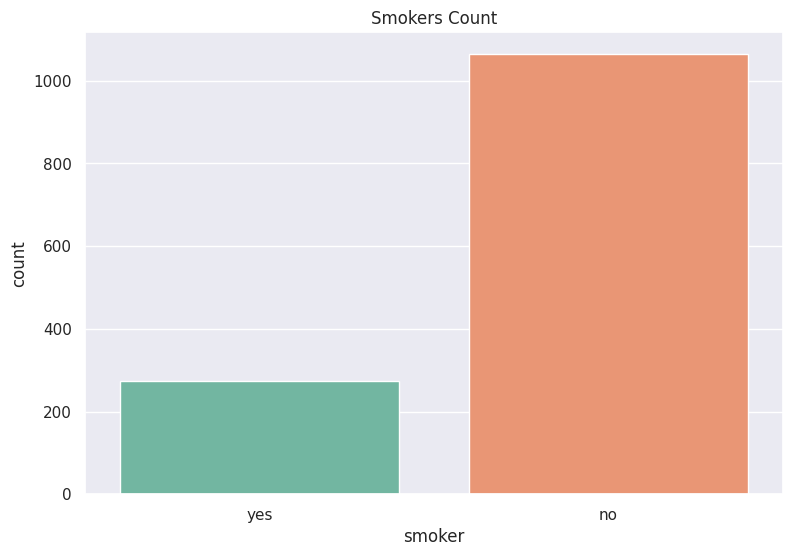

In [10]:
sns.set()
plt.figure(figsize=(9, 6))
sns.countplot(x = data['smoker'], data=data, palette='Set2', hue='smoker')
plt.title('Smokers Count')
plt.show()

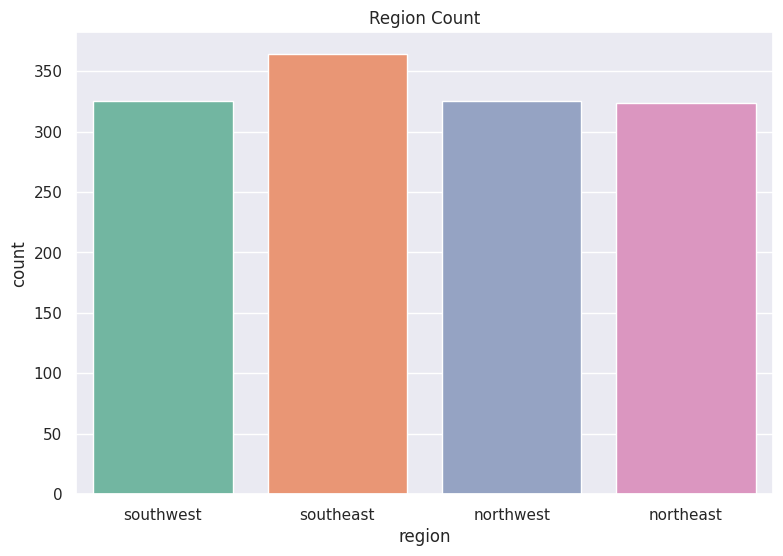

In [11]:
sns.set()
plt.figure(figsize=(9, 6))
sns.countplot(x = data['region'], data=data, palette='Set2', hue='region')
plt.title('Region Count')
plt.show()

In [12]:
data['sex'] = data['sex'].replace({'male': 0, 'female': 1})
data['smoker'] = data['smoker'].replace({'no': 0, 'yes': 1})
data['region'] = data['region'].replace({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})
data

<ipython-input-12-1f669cf6b612>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sex'] = data['sex'].replace({'male': 0, 'female': 1})
<ipython-input-12-1f669cf6b612>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['smoker'] = data['smoker'].replace({'no': 0, 'yes': 1})
<ipython-input-12-1f669cf6b612>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, 

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


In [13]:
data_in = data.drop(columns=['charges'])
data_out = data['charges']

In [14]:
print(data_in)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       0
1      18    0  33.770         1       0       1
2      28    0  33.000         3       0       1
3      33    0  22.705         0       0       2
4      32    0  28.880         0       0       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       2
1334   18    1  31.920         0       0       3
1335   18    1  36.850         0       0       1
1336   21    1  25.800         0       0       0
1337   61    1  29.070         0       1       2

[1338 rows x 6 columns]


In [15]:
print(data_out)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [16]:
data_in_train, data_in_test, data_out_train, data_out_test = train_test_split(data_in, data_out, test_size=0.2, random_state=2)

In [17]:
print(data_in.shape, data_in_train.shape, data_in_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [18]:
print(data_out.shape, data_out_test.shape, data_out_test.shape)

(1338,) (268,) (268,)


In [19]:
model = RandomForestRegressor(n_estimators=100, max_depth=7)

In [20]:
model.fit(data_in_train, data_out_train)

RandomForestRegressor(max_depth=7)

In [21]:
data_test_prediction = model.predict(data_in_test)
data_test_prediction

array([ 5421.26123984, 12160.01365213, 14200.13226372,  3180.26269912,
        9495.72429425,  9107.91331297,  4735.1394114 ,  2489.45141157,
       16414.57828816,  7582.65230286, 12656.78237175,  7910.87864622,
       18474.06507698,  1687.37352409, 10671.13614093, 14310.06529478,
        3961.25910421,  6572.61412813, 20037.48689261,  2705.52729951,
       12161.94728803,  3236.54476663, 39646.13989842, 20850.08138574,
       37798.67102113, 11975.62231038,  5802.21411255,  9242.43142196,
        5359.54903992,  4705.6542991 ,  7193.87427036,  6330.33245529,
        7510.07810383,  5370.65119497,  8848.63350683,  6104.586761  ,
       39220.57293397,  5755.66495689, 17714.83759098, 14170.78780889,
        2167.47140118, 35740.96909773,  8095.84865179,  2154.6310182 ,
        7802.15211459,  6144.80413451, 10757.76807799,  5735.50707555,
        5884.66533631, 11807.26058751,  7044.99368882,  1824.5146879 ,
       17539.0450134 , 44761.41329344,  6977.06662884, 13613.49357296,
      

In [22]:
from sklearn.metrics import r2_score
r2_score(data_test_prediction, data_out_test)

0.8255163608817098

In [23]:
# age  sex    bmi      children  smoker  region
# 61    1  29.070         0       1       2
import numpy as np
input_data = (61, 1, 29.07, 0, 1, 2)
input_data_array = np.asarray(input_data)
input_data_array = input_data_array.reshape(1, -1)
prediction = model.predict(input_data_array)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [24]:
print(prediction[0])

28682.550030061862


In [25]:
import pickle as pk
pk.dump(model, open('MISPM.pkl', 'wb'))